
## DLC2Kinematics Toolbox demo!

We recommend simply adding this to your DEEPLABCUT conda env by running `pip install dlc2kinematics`! 

**Functions demo'd:**
- load data (2d and 3d)
- 3D visualizer
- 2D visualizer

**Main Motion Analysis:**
- compute bodypart velocities (and plot)
- define joints from bodyparts
- compute joint angles
- compute joint velocity
- compute joint accelertion
- compute correlation maps (for vel or accel)
- compute and plot PCA's of joint vel and accel

**Quarterions:**
   - compute_joint_doubleangles 
   - plot_joint_quaternions
   - compute_joint_quaternion_velocity 
   
**Posture reconstruction:**
- 3d reconstruction of posture give X # of principal components 

**Compute motion synergies:**
- extract kinematic synergies
- visualize in the 3D visualizer the synergies

In [1]:
import dlc2kinematics
dlc2kinematics.__version__

'0.0.1'

### Load the .h5 file(s) from DeepLabCut

these can be 2D and/or 3D files

In [2]:
DLC_2D_file1 ='./examples/reachingDEMO_2D.h5'
DLC_2D_file2 ='./examples/reachingDEMO_2D.h5' #(just as a demo here we use the same 2d file)
DLC_3D_file ='./examples/reachingDEMO_3D.h5'

#IF you have both 2D and 3D data, please also load the 3D config.yaml file to use our 3D visualizer tool. 
# More information on this file can be found here: https://github.com/AlexEMG/DeepLabCut/blob/master/docs/Overviewof3D.md

config = './examples/config.yaml'

#### Decide which file to use for kinematik computations:

In [3]:
df, bodyparts, scorer = dlc2kinematics.load_data(DLC_3D_file) #<-- change input here if you want!
df.head(5)

scorer    Reaching_3D                                                      \
bodyparts        nose                     Left_wrist                        
coords              x         y         z          x         y          z   
42150        6.842852 -3.407751  9.406833   4.636382 -1.551993  10.892330   
42151        6.850280 -3.402158  9.405703   4.636619 -1.551599  10.894117   
42152        6.856927 -3.400200  9.408107   4.638512 -1.549706  10.892901   
42153        6.862259 -3.400330  9.412964   4.640105 -1.549008  10.895374   
42154        6.865363 -3.400129  9.413668   4.639502 -1.550129  10.897128   

scorer                                       ...                              \
bodyparts left_backofhand         L_Finger1  ... R_Finger3_Tip R_Finger4_Tip   
coords                  x   y   z         x  ...             z             x   
42150                 NaN NaN NaN       NaN  ...      9.348213      3.604378   
42151                 NaN NaN NaN       NaN  ...      9.349781      3.582369   
42152                 NaN NaN NaN       NaN  ...      9.351119      3.583764   
42153                 NaN NaN NaN       NaN  ...      9.351676      3.586055   
42154                 NaN NaN NaN       NaN  ...      9.352722      3.588239   

scorer                                                                        \
bodyparts                     R_Wrist_Top                     R_Wrist_Bottom   
coords            y         z           x         y         z              x   
42150     -0.890930  9.137236    3.954857 -1.350215  9.493940       3.645868   
42151     -0.901680  9.158014    3.952940 -1.350519  9.493784       3.644104   
42152     -0.902340  9.159531    3.952654 -1.349535  9.494908       3.645225   
42153     -0.901990  9.162479    3.954279 -1.351182  9.495445       3.646102   
42154     -0.900954  9.162210    3.956090 -1.348909  9.492072       3.646739   

scorer                         
bodyparts                      
coords            y         z  
42150     -1.251256  9.342439  
42151     -1.251670  9.343486  
42152     -1.250200  9.343185  
42153     -1.249491  9.344671  
42154     -1.249286  9.342824  

[5 rows x 99 columns]

### This package also includes a 3D visualizer if you have 3D data from DeepLabCut. 

If you just have 2D data, all other functions are still availble to you. 

<IPython.core.display.Javascript object>


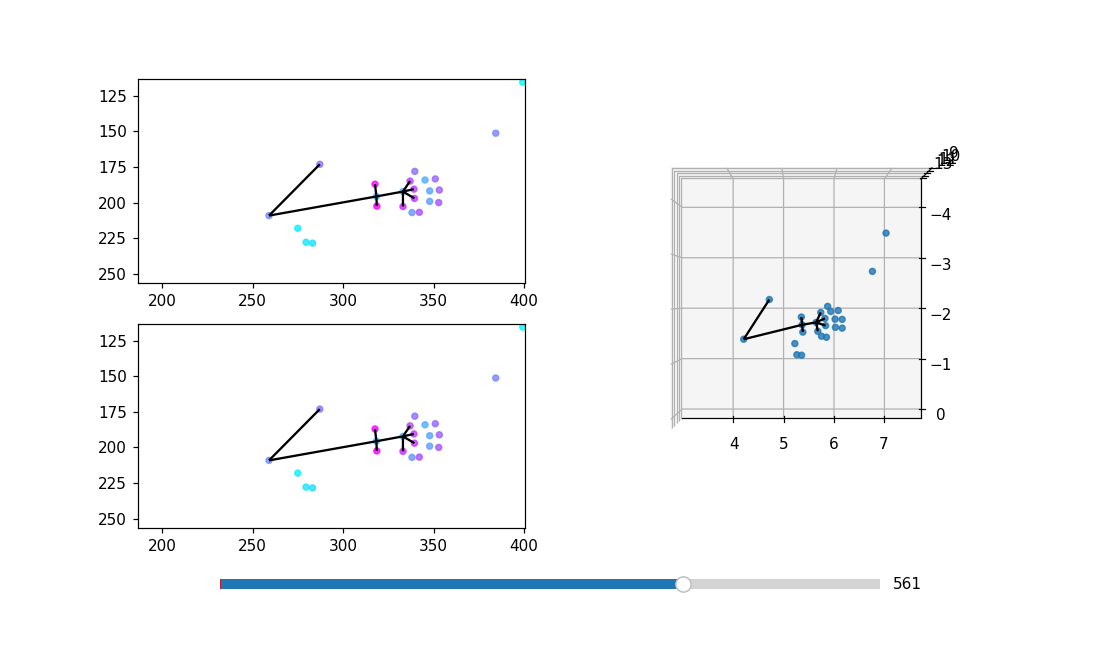

In [33]:
%matplotlib notebook
from dlc2kinematics import Visualizer3D
viz = Visualizer3D(config, DLC_3D_file, [DLC_2D_file1, DLC_2D_file2])
viz.view(show_axes=True, show_grid=True)

<IPython.core.display.Javascript object>


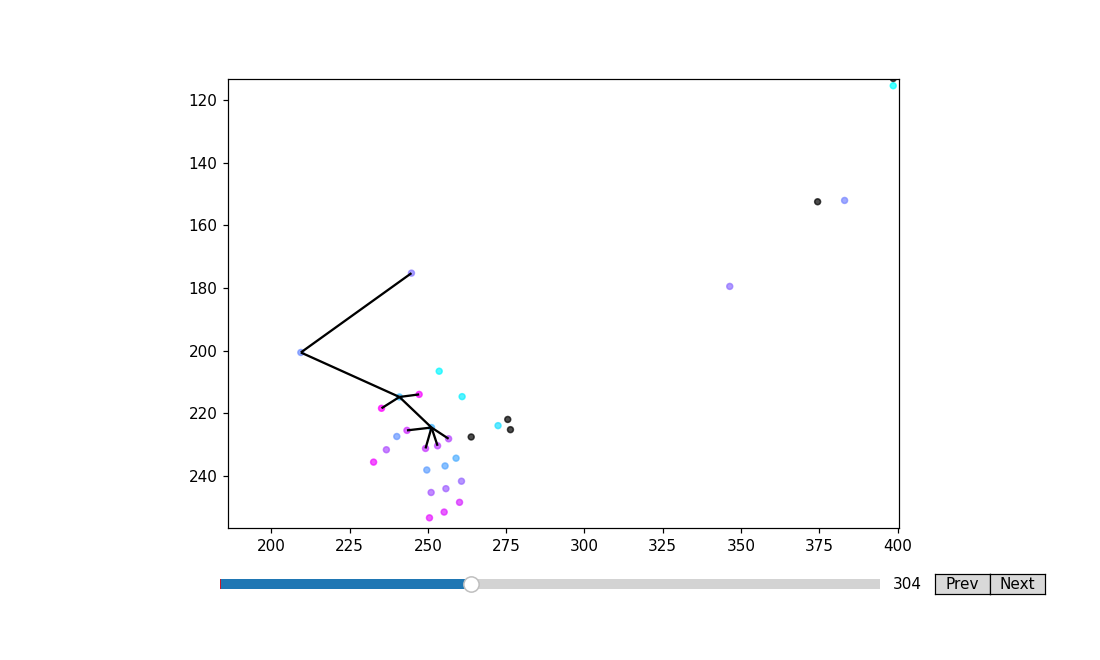

In [34]:
%matplotlib notebook
from dlc2kinematics import Visualizer2D
viz = Visualizer2D(config, DLC_2D_file1)
viz.view(show_axes=True, show_grid=True)

#### As a reminder, you can look at the docstring for every function by:

In [6]:
dlc2kinematics.compute_velocity?

### Compute the velocity & speed of bodyparts in the input dataframe (all or a subset):

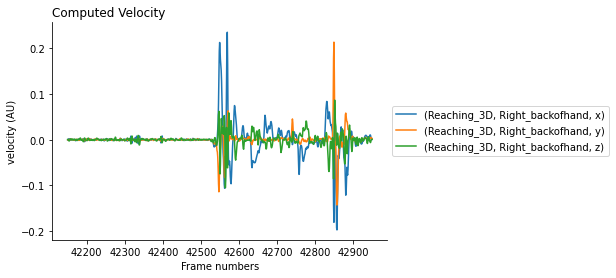

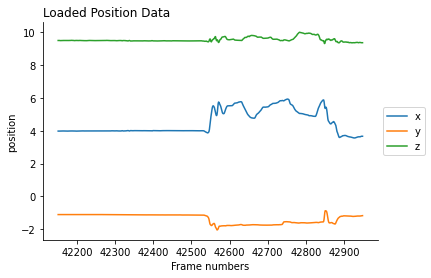

In [7]:
#Compute for All bodyparts:
df_vel = dlc2kinematics.compute_velocity(df,bodyparts=['all'], filter_window=3, order=1)
df_speed = dlc2kinematics.compute_speed(df,bodyparts=['all'], filter_window=3, order=1)

#example for 1 bodypart for velocity:
df_vel_RBOH = dlc2kinematics.compute_velocity(df,bodyparts=['Right_backofhand'],filter_window=3, order=1)
df_vel_RBOH.head(3)

#plot 1 bodypart, including original DLC positions & new velocity:
%matplotlib inline
import matplotlib.pyplot as plt
dlc2kinematics.plot_velocity(df[scorer]['Right_backofhand'], df_vel_RBOH)#, start=42150,end=42450) #42150:42450

### Define Joints: that will be used to compute joint angles, joint velocities, etc.

The names are idential to the "bodyparts" from the config.yaml file from your DLC project. If you want to see them listed here, simply run: `df.keys()`

In [8]:
joints_dict={}

joints_dict['R-Elbow']  = ['R_shoulder', 'Right_elbow', 'Right_wrist']
joints_dict['R-Wrist']  = ['Right_elbow', 'Right_wrist', 'Right_backofhand']
joints_dict['R-WristAngle']  = ['R_Wrist_Bottom', 'Right_wrist', 'R_Wrist_Top']

#hand:
joints_dict['R-W-BackHand-Finger1'] = ['Right_wrist', 'Right_backofhand', 'R_Finger1_Base']
joints_dict['R-W-BackHand-Finger2'] = ['Right_wrist', 'Right_backofhand', 'R_Finger2_Base']
joints_dict['R-W-BackHand-Finger3'] = ['Right_wrist', 'Right_backofhand', 'R_Finger3_Base']
joints_dict['R-W-BackHand-Finger4'] = ['Right_wrist', 'Right_backofhand', 'R_Finger4_Base']

joints_dict['R-MCP1'] = ['Right_backofhand', 'R_Finger1_Base', 'R_Finger1']
joints_dict['R-MCP2'] = ['Right_backofhand', 'R_Finger2_Base', 'R_Finger2']
joints_dict['R-MCP3'] = ['Right_backofhand', 'R_Finger3_Base', 'R_Finger3']
joints_dict['R-MCP4'] = ['Right_backofhand', 'R_Finger4_Base', 'R_Finger4']

joints_dict['R-IP1'] = ['R_Finger1_Base', 'R_Finger1', 'R_Finger1_Int']
joints_dict['R-IP2'] = ['R_Finger2_Base', 'R_Finger2', 'R_Finger2_Int']
joints_dict['R-IP3'] = ['R_Finger3_Base', 'R_Finger3', 'R_Finger3_Int']
joints_dict['R-IP4'] = ['R_Finger4_Base', 'R_Finger4', 'R_Finger3_Int']

#print:
joints_dict

{'R-Elbow': ['R_shoulder', 'Right_elbow', 'Right_wrist'],
 'R-Wrist': ['Right_elbow', 'Right_wrist', 'Right_backofhand'],
 'R-WristAngle': ['R_Wrist_Bottom', 'Right_wrist', 'R_Wrist_Top'],
 'R-W-BackHand-Finger1': ['Right_wrist', 'Right_backofhand', 'R_Finger1_Base'],
 'R-W-BackHand-Finger2': ['Right_wrist', 'Right_backofhand', 'R_Finger2_Base'],
 'R-W-BackHand-Finger3': ['Right_wrist', 'Right_backofhand', 'R_Finger3_Base'],
 'R-W-BackHand-Finger4': ['Right_wrist', 'Right_backofhand', 'R_Finger4_Base'],
 'R-MCP1': ['Right_backofhand', 'R_Finger1_Base', 'R_Finger1'],
 'R-MCP2': ['Right_backofhand', 'R_Finger2_Base', 'R_Finger2'],
 'R-MCP3': ['Right_backofhand', 'R_Finger3_Base', 'R_Finger3'],
 'R-MCP4': ['Right_backofhand', 'R_Finger4_Base', 'R_Finger4'],
 'R-IP1': ['R_Finger1_Base', 'R_Finger1', 'R_Finger1_Int'],
 'R-IP2': ['R_Finger2_Base', 'R_Finger2', 'R_Finger2_Int'],
 'R-IP3': ['R_Finger3_Base', 'R_Finger3', 'R_Finger3_Int'],
 'R-IP4': ['R_Finger4_Base', 'R_Finger4', 'R_Finger3_In

### Now, let's compute the joint angles

We recommend checking the docstring here, there are several decisions you can make. You can also store these computations at this point, as it takes a bit of time to compute this. Read the docs to find out more.

In [9]:
dlc2kinematics.compute_joint_angles?

Computing joint angles for R-Elbow
Computing joint angles for R-Wrist
Computing joint angles for R-WristAngle
Computing joint angles for R-W-BackHand-Finger1
Computing joint angles for R-W-BackHand-Finger2
Computing joint angles for R-W-BackHand-Finger3
Computing joint angles for R-W-BackHand-Finger4
Computing joint angles for R-MCP1
Computing joint angles for R-MCP2
Computing joint angles for R-MCP3
Computing joint angles for R-MCP4
Computing joint angles for R-IP1
Computing joint angles for R-IP2
Computing joint angles for R-IP3
Computing joint angles for R-IP4


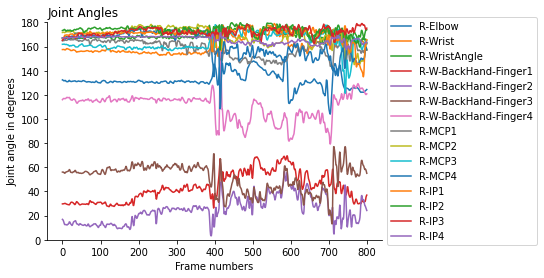

In [10]:
joint_angles = dlc2kinematics.compute_joint_angles(df,joints_dict, 
                                              dropnan=True, smooth=True, save=False)
#you may want to set save=True once you settle on this; so you don't have to recompute.

#plot:
dlc2kinematics.plot_joint_angles(joint_angles)

### Compute joint angular velocity & acceleration:

In [11]:
joint_vel=dlc2kinematics.compute_joint_velocity(joint_angles)
joint_acc=dlc2kinematics.compute_joint_acceleration(joint_angles)

Saving the joint angular velocity as a pandas array in /Users/mwmathis/Documents/DLC2Kinematics 
Saving the joint angular acceleration as a pandas array in /Users/mwmathis/Documents/DLC2Kinematics 


In [12]:
kinematik.compute_correlation?

Object `kinematik.compute_correlation` not found.


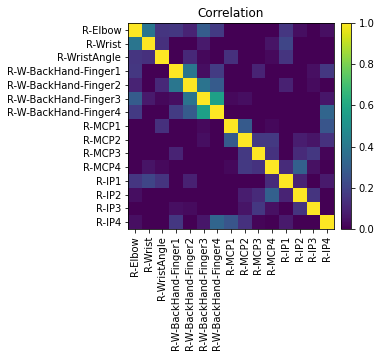

In [13]:
#Compute correlation of angular velocity or accel (you can change the input here):
corr=dlc2kinematics.compute_correlation(joint_vel, plot=True,colormap='viridis')

#this can help you find joints that are not highly correlated, 
#which you might want to use for other analysis steps
#i.e. here the digits are rather highly correlated.

### Compute PCA of angular velocity & acceleration:

In [14]:
dlc2kinematics.compute_pca?

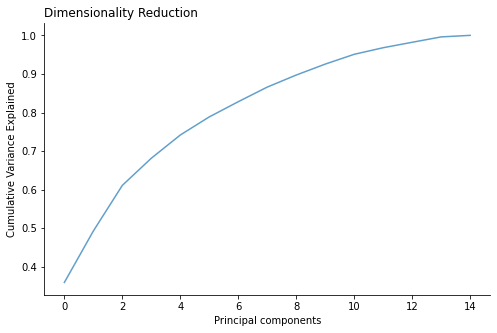

The number of principal components is: 15
[0.35948942 0.4928804  0.61113646 0.68151904 0.74171376 0.78865808
 0.82802938 0.86592083 0.8971493  0.92547639 0.95089285 0.96796722
 0.98206285 0.99601575 1.        ]


In [15]:
pca = dlc2kinematics.compute_pca(joint_vel, plot=True)
#pca_accel =dlc2kinematics.compute_pca(joint_acc, plot=True)

# PCA Stats:
print("The number of principal components is: %s"%pca.n_components_)
import numpy as np
print(np.cumsum(pca.explained_variance_ratio_))

## Extract Joint Synergies

 To extract all synergies explaining up to 80% variance:

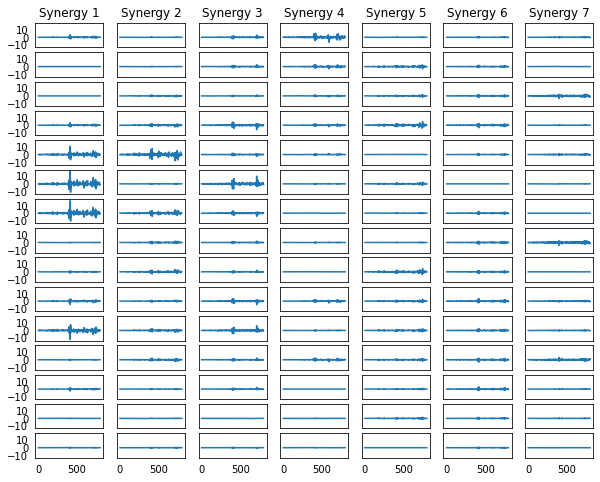

In [16]:
joint_vel_recons, _, _ = dlc2kinematics.extract_kinematic_synergies(joint_vel, tol=0.8)
dlc2kinematics.visualize_synergies(joint_vel_recons)

### Visualize extracted 3D synergies
    To retain only synergy #2 and #4 and amplify their effect on reconstruction by a factor of 5:
    >>> dlc2kinematics.extract_kinematic_synergies(data, num_syn=[1, 3], ampl=5)

/Users/mwmathis/opt/anaconda3/envs/DLC2K/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


<IPython.core.display.Javascript object>


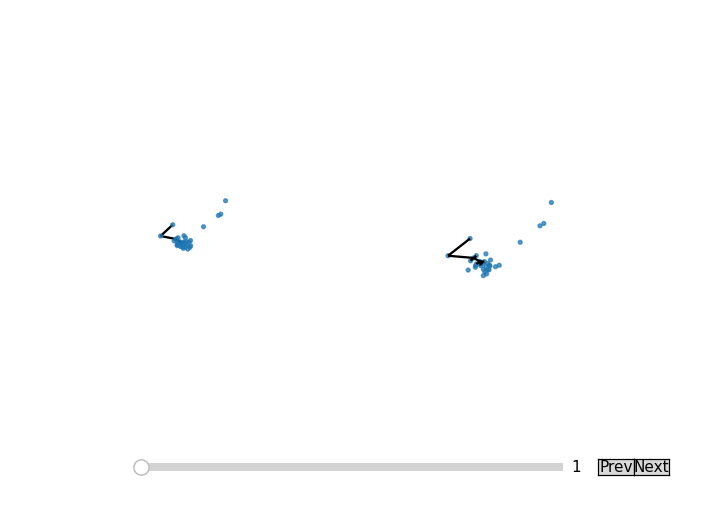

In [17]:
%matplotlib notebook
from dlc2kinematics.visualization import MinimalVisualizer3D, MultiVisualizer

#remove NaNs & compute specific synergies:
kine = df.dropna(how='all', axis=1).ffill().bfill()
kine_recons, _, _ = dlc2kinematics.extract_kinematic_synergies(kine, num_syn=[2, 4], ampl=5)

#grab bodyparts to plot from config.yaml file:
bodyparts = kine.columns.get_level_values('bodyparts').unique().tolist()
cfg = dlc2kinematics.utils.read_config(config)
links = [(bodyparts.index(bp1), bodyparts.index(bp2)) for bp1, bp2 in cfg['skeleton']]
ind_links = tuple(zip(*links))

#Plot:
vizs = [MinimalVisualizer3D(mat, ind_links) for mat in kine_recons]
viz_multi = MultiVisualizer(vizs)
viz_multi.populate_window()

### PCA reconstruction based on posture (for 3D data)

In [35]:
# Select the bodyparts related to the reconstruction:
bodyparts2plot=['R_shoulder', 'Right_elbow', 
                'R_Wrist_Bottom', 'Right_wrist', 'R_Wrist_Top',
                'Right_backofhand','R_Finger1_Base','R_Finger1','R_Finger1_Int',
                'R_Finger2_Base','R_Finger2','R_Finger2_Int',
                'R_Finger3_Base','R_Finger3','R_Finger3_Int',
                'R_Finger4_Base','R_Finger4','R_Finger4_Int','R_Wrist_Top','R_Wrist_Bottom']
 
# Select bodyparts to connect as as skeleton
bp_to_connect = ['R_shoulder', 'Right_elbow','Right_wrist','Right_backofhand',
                     'R_Finger1_Base','R_Finger1','R_Finger1_Int',
                     'R_Finger1_Int','R_Finger1','R_Finger1_Base','Right_backofhand',
                     'R_Finger2_Base','R_Finger2','R_Finger2_Int',
                     'R_Finger2_Int','R_Finger2','R_Finger2_Base','Right_backofhand',
                     'R_Finger3_Base','R_Finger3','R_Finger3_Int',
                     'R_Finger3_Int','R_Finger3','R_Finger3_Base','Right_backofhand',
                     'R_Finger4_Base','R_Finger4','R_Finger4_Int',]
###############################################################

#set up what parts to use for PCA reconstruction:
df_hand = df.loc[:,df.columns.get_level_values(1).isin(bodyparts2plot)]

<IPython.core.display.Javascript object>


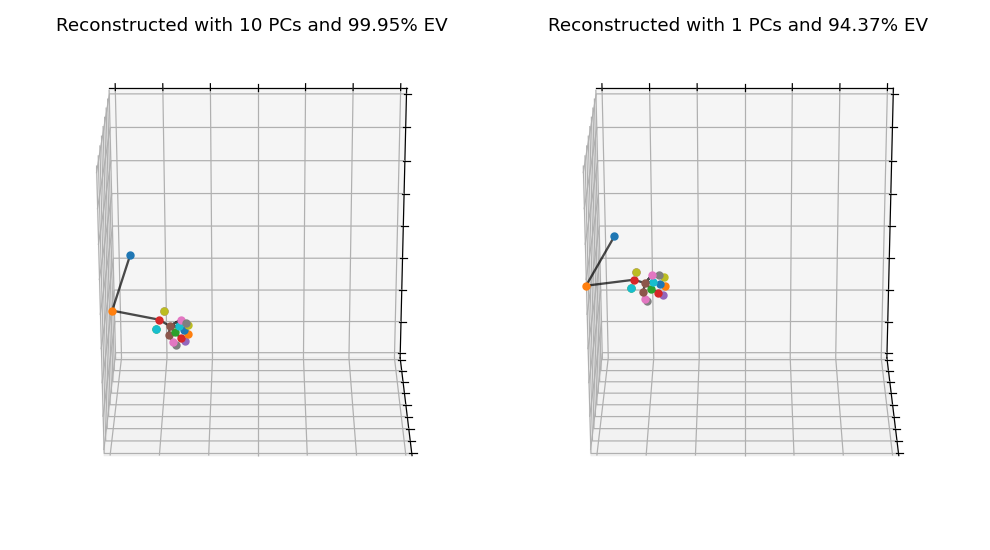

/Users/mwmathis/opt/anaconda3/envs/DLC2K/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/mwmathis/opt/anaconda3/envs/DLC2K/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/mwmathis/Documents/DLC2Kinematics/dlc2kinematics/plotting.py:239: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_projected.loc(axis=1)[scorer, bp] = projected_reshape[:, idx]
/Users/mwmathis/opt/anaconda3/envs/DLC2K/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.wa

In [19]:
dlc2kinematics.plot_3d_pca_reconstruction(df_hand, n_components=10, framenumber=705,
                                     bodyparts2plot=bodyparts2plot, bp_to_connect=bp_to_connect)

### Quaternions computations:

[ what are quaternions? https://en.wikipedia.org/wiki/Quaternions_and_spatial_rotation ]

   - compute_joint_quaternions,compute_joint_quaternion_velocity, compute_joint_quaternion_acceleration
   - plot_joint_quaternions
   - compute_joint_doubleangles

In [20]:
dlc2kinematics.compute_joint_quaternions?

In [21]:
jointQuaternions = dlc2kinematics.compute_joint_quaternions(df, joints_dict, save=False)
# <-- must "save" to use other functions?? unclear to MWM...

Computing joint quaternions for R-Elbow
Computing joint quaternions for R-Wrist
Computing joint quaternions for R-WristAngle
Computing joint quaternions for R-W-BackHand-Finger1
Computing joint quaternions for R-W-BackHand-Finger2
Computing joint quaternions for R-W-BackHand-Finger3
Computing joint quaternions for R-W-BackHand-Finger4
Computing joint quaternions for R-MCP1
Computing joint quaternions for R-MCP2
Computing joint quaternions for R-MCP3
Computing joint quaternions for R-MCP4
Computing joint quaternions for R-IP1
Computing joint quaternions for R-IP2
Computing joint quaternions for R-IP3
Computing joint quaternions for R-IP4


In [22]:
dlc2kinematics.plot_joint_quaternions?

<IPython.core.display.Javascript object>


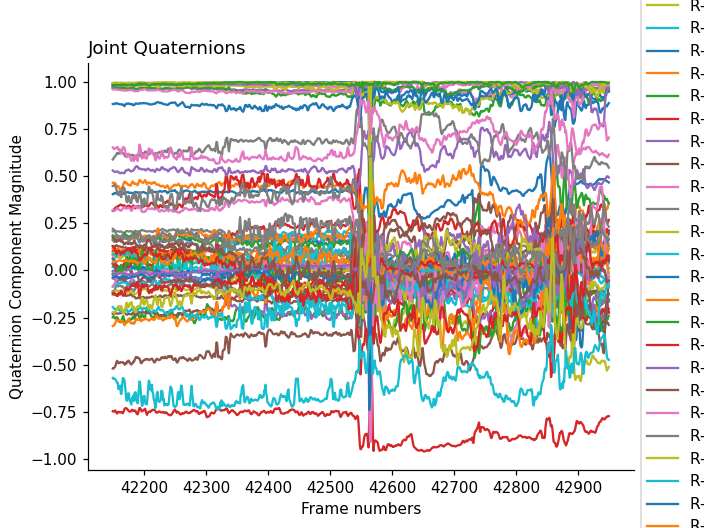

In [23]:
dlc2kinematics.plot_joint_quaternions(jointQuaternions)

In [24]:
dlc2kinematics.compute_joint_quaternion_velocity?

In [25]:
quaternion_vel = dlc2kinematics.compute_joint_quaternion_velocity(jointQuaternions)
quaternion_vel.head()

joint name   R-Elbow                                 R-Wrist            \
comp               a         b         c         d         a         b   
42150       0.001224 -0.001167 -0.000143 -0.000013 -0.000016  0.000298   
42151       0.001224 -0.001167 -0.000143 -0.000013 -0.000016  0.000298   
42152       0.003871 -0.004521 -0.004732  0.000886  0.000190  0.001715   
42153       0.002166  0.000060 -0.003396  0.002373 -0.000074 -0.000558   
42154      -0.000812 -0.001304  0.000104 -0.001273 -0.000329 -0.001141   

joint name                     R-WristAngle            ...     R-IP2  \
comp               c         d            a         b  ...         c   
42150      -0.000270  0.000344    -0.000216 -0.001109  ...  0.000223   
42151      -0.000270  0.000344    -0.000216 -0.001109  ...  0.000223   
42152      -0.000226  0.000235     0.000502  0.000014  ... -0.000106   
42153       0.002250 -0.000747     0.000065 -0.001555  ...  0.002081   
42154       0.004372 -0.000629    -0.000973 -0.003647  ...  0.002880   

joint name               R-IP3                                   R-IP4  \
comp               d         a         b         c         d         a   
42150       0.000134  0.000937 -0.004052  0.001163 -0.002274 -0.003773   
42151       0.000134  0.000937 -0.004052  0.001163 -0.002274 -0.003773   
42152       0.000152  0.000301 -0.000476 -0.000119 -0.001423 -0.001077   
42153       0.000250  0.001745 -0.007266  0.001904 -0.005250  0.001455   
42154       0.000414  0.002412 -0.012688  0.003512 -0.005711  0.002500   

joint name                                
comp               b         c         d  
42150       0.002070 -0.002129 -0.001815  
42151       0.002070 -0.002129 -0.001815  
42152       0.001480  0.000302 -0.000168  
42153      -0.002276  0.003438 -0.001475  
42154      -0.006652  0.004843 -0.004146  

[5 rows x 60 columns]

<IPython.core.display.Javascript object>


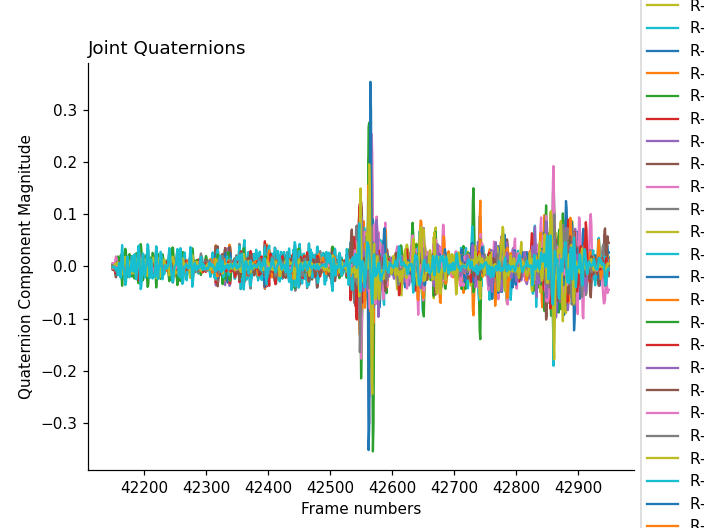

In [26]:
dlc2kinematics.plot_joint_quaternions(quaternion_vel)

In [27]:
dlc2kinematics.compute_joint_quaternion_acceleration?

In [28]:
quaternion_acc = dlc2kinematics.compute_joint_quaternion_acceleration(jointQuaternions)
quaternion_acc.head()

joint name   R-Elbow                                 R-Wrist            \
comp               a         b         c         d         a         b   
42150       0.004599 -0.004429 -0.009892  0.002987  0.000387  0.001860   
42151       0.004599 -0.004429 -0.009892  0.002987  0.000387  0.001860   
42152       0.000695 -0.002279  0.000713 -0.001188  0.000024  0.000974   
42153      -0.004105  0.011440  0.001958  0.004162 -0.000551 -0.005519   
42154      -0.001850 -0.014167  0.005043 -0.011455  0.000040  0.004351   

joint name                     R-WristAngle            ...     R-IP2  \
comp               c         d            a         b  ...         c   
42150       0.001731 -0.001210     0.000465 -0.000490  ...  0.000038   
42151       0.001731 -0.001210     0.000465 -0.000490  ...  0.000038   
42152      -0.001645  0.000991     0.000971  0.002736  ... -0.000695   
42153       0.006596 -0.002954    -0.001844 -0.005875  ...  0.005069   
42154      -0.002351  0.003190    -0.000231  0.001691  ... -0.003471   

joint name               R-IP3                                   R-IP4  \
comp               d         a         b         c         d         a   
42150       0.002871 -0.000690  0.003458 -0.000950  0.001199  0.003604   
42151       0.002871 -0.000690  0.003458 -0.000950  0.001199  0.003604   
42152      -0.002836 -0.000582  0.003695 -0.001614  0.000503  0.001787   
42153       0.003032  0.003470 -0.017274  0.005661 -0.008157  0.003278   
42154      -0.002703 -0.002136  0.006429 -0.002444  0.007236 -0.001188   

joint name                                
comp               b         c         d  
42150       0.002252  0.000357  0.005741  
42151       0.002252  0.000357  0.005741  
42152      -0.003431  0.004506 -0.002446  
42153      -0.004082  0.001766 -0.000169  
42154      -0.004669  0.001044 -0.005172  

[5 rows x 60 columns]

<IPython.core.display.Javascript object>


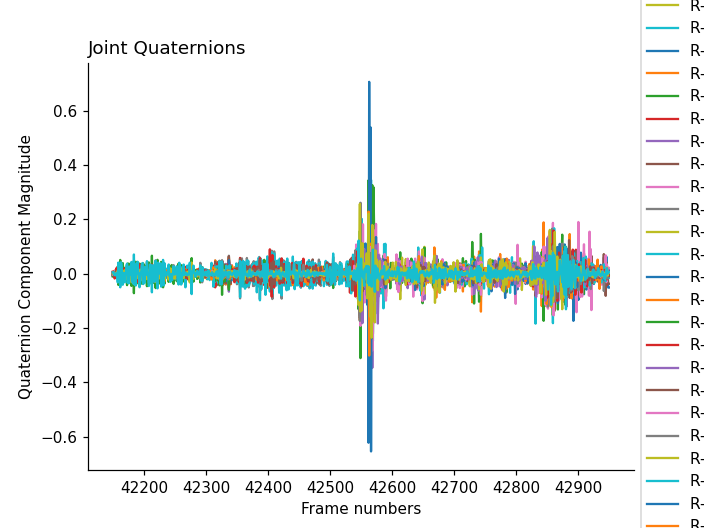

In [29]:
dlc2kinematics.plot_joint_quaternions(quaternion_acc)

In [30]:
dlc2kinematics.compute_joint_doubleangles?

In [31]:
joint_doubleangles = dlc2kinematics.compute_joint_doubleangles(df, joints_dict, save=True)
joint_doubleangles.head()

File already present. Reading doubleangles_Reaching_3D


R-Elbow               R-Wrist            R-WristAngle            \
           pitch        yaw      pitch        yaw        pitch       yaw   
42150 -86.429534  56.722829 -81.883563  61.326912    67.499378  5.655996   
42151 -86.513506  56.779108 -81.923994  61.238409    66.957047  5.889345   
42152 -86.349831  56.818600 -82.037717  61.443344    66.405732  6.014105   
42153 -86.145395  57.011911 -82.130710  61.893643    66.427885  5.841545   
42154 -86.092977  56.496676 -82.241113  61.166968    64.575386  5.653457   

      R-W-BackHand-Finger1            R-W-BackHand-Finger2             ...  \
                     pitch        yaw                pitch        yaw  ...   
42150           -44.472620  52.082226           -60.981358  37.219860  ...   
42151           -44.417716  53.569871           -61.259945  35.951440  ...   
42152           -44.314398  51.561168           -61.467120  38.148512  ...   
42153           -44.160938  50.003781           -61.674033  39.287340  ...   
42154           -44.502193  46.757200           -60.200362  43.348354  ...   

          R-MCP4                 R-IP1                 R-IP2             \
           pitch        yaw      pitch        yaw      pitch        yaw   
42150  84.293566  47.051397  66.546746 -68.217915 -64.844056 -42.801624   
42151  84.167977  47.328475  65.148174 -70.240837 -65.269698 -42.394307   
42152  83.992155  48.791363  63.478155 -71.683632 -66.665857 -42.463415   
42153  83.844450  49.126482  62.739959 -72.532041 -67.971542 -40.697029   
42154  83.510315  49.764336  60.972072 -74.606025 -67.582295 -44.201850   

           R-IP3                 R-IP4             
           pitch        yaw      pitch        yaw  
42150 -69.226880 -56.657689  58.885825  65.966087  
42151 -69.133111 -57.321889  59.004753  66.117391  
42152 -69.106416 -57.515728  59.006970  65.983252  
42153 -68.647670 -57.237368  59.029607  65.879739  
42154 -68.104577 -59.044141  59.053873  65.952539  

[5 rows x 30 columns]

<IPython.core.display.Javascript object>


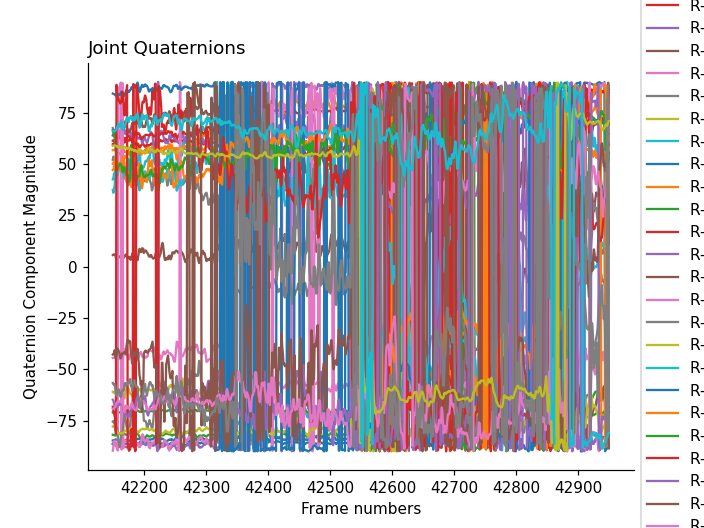

In [32]:
dlc2kinematics.plot_joint_quaternions(joint_doubleangles)